In [4]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [6]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis,:]

    return img

In [18]:
style_image = load_image('./monet.jpeg')
content_image = load_image('./alpaca.jpg')

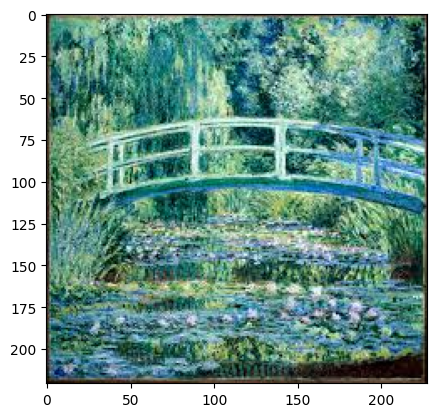

In [21]:
plt.imshow(np.squeeze(style_image))
plt.show()

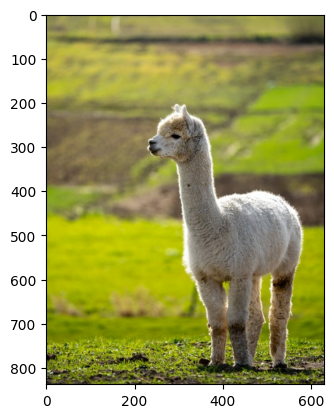

In [20]:
plt.imshow(np.squeeze(content_image))
plt.show()

In [28]:
stylized_img = model(tf.constant(content_image), tf.constant(style_image))[0]

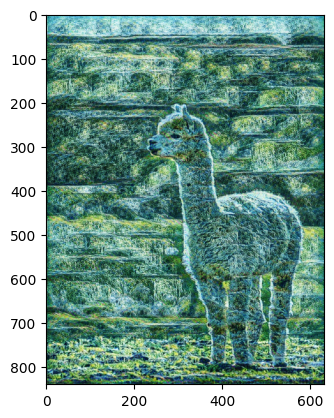

In [29]:
plt.imshow(np.squeeze(stylized_img))
plt.show()

In [30]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_img)*255, cv2.COLOR_BGR2RGB))

True